In [1]:
import pandas as pd
import numpy as np
import itertools
import sys
sys.path.insert(0,'../..')

from g4l import SmallestMaximizerCriterion
from g4l.estimators.ctm_scanner import CTMScanner
from g4l.evaluation.bootstrap import Bootstrap
from g4l.evaluation.t_test import TTest
from g4l.data import Sample


cache_dir = '../example1/cache'

In [2]:
# Create a sample object instance
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])

# Define the champion trees strategy to be used
ctm_scan = CTMScanner(penalty_interval=(0.1, 400), epsilon=0.01)

# Instantiates SMC by passing the strategies that will
# be used to generate the candidate trees
smc = SmallestMaximizerCriterion(ctm_scan, max_depth=4, read_cache_dir=cache_dir, write_cache_dir=cache_dir)

In [3]:
# Define the champion trees strategy to be used
num_resamples = 200
bootstrap = Bootstrap(X, partition_string='4')
small_resamples = bootstrap.resample(num_resamples, size=len(X.data) * 0.3)
large_resamples = bootstrap.resample(num_resamples, size=len(X.data) * 0.9)
t_test = TTest(small_resamples, large_resamples, alpha=0.01)

In [4]:
# Run estimator
smc.fit(X, t_test, processors=3)

In [5]:
from g4l.tree import ContextTree
import matplotlib.pyplot as plt

In [6]:
t = ContextTree(X, max_depth=4)
t.df.head(40)

,l,node_idx,parent_idx,node,node_freq,lps,ps,child_probs,flag,final
0,1,0,None,0,44111,-62840.152905,0.451259,"[0.23846659563374215, 0.29559520301058695, 0.3...",0,0
1,1,1,None,1,21830,-18794.382713,0.223323,"[0.6933577645442052, 0.0, 0.20998625744388455,...",0,0
2,1,2,None,2,21830,-14715.435172,0.223323,"[0.5972972972972973, 0.4027027027027027, 0.0, ...",0,0
3,1,3,None,3,7909,-6671.568838,0.080910,"[0.6849159185737768, 0.0, 0.2073587052724744, ...",0,0
4,1,4,None,4,2070,-1325.580428,0.021176,"[0.0, 0.0, 0.6608695652173913, 0.3381642512077...",0,0
5,2,5,0,00,10519,-11216.584131,0.107611,"[0.31400323224641125, 0.5552809202395665, 0.08...",0,0
6,2,6,0,10,15136,-14916.737004,0.154844,"[0.065473044397463, 0.0, 0.6489825581395349, 0...",0,0
7,2,7,0,20,13039,-8967.204940,0.133391,"[0.4479638009049774, 0.5520361990950227, 0.0, ...",0,0
8,2,8,0,30,5417,-5036.786245,0.055417,"[0.07088794535720878, 0.0, 0.6437142329702787,...",0,0
9,2,9,0,40,0,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,0


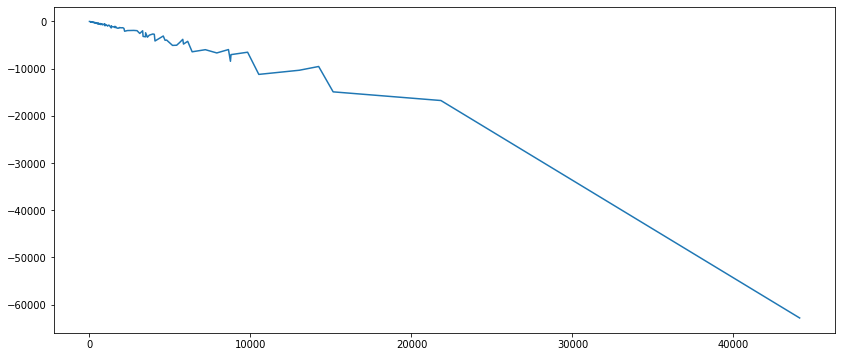

Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,     9,
               11,
            ...
             8634,  8757,  8791,  9823, 10519, 13039, 14236, 15136, 21830,
            44111],
           dtype='int64', name='node_freq', length=189)

In [48]:
x = t.df
x = x.sort_values(['node_freq'], ascending=False)
x = x.groupby(['node_freq']).median()
plt.figure(figsize=(14, 6))
plt.plot(x.lps)
#plt.xscale('log')
plt.show()
x.index